#**Phase 1**

In [ ]:
# Phase 1
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd #data processing
pd.set_option('display.max_rows', 500)

import os
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
lemmatizer=WordNetLemmatizer()

def clean_text(input_df):

  for index,row in input_df.iterrows():
      filter_sentence = ''

      sentence = row['text']
      sentence = re.sub(r'[^\w\s]','',sentence) #cleaning

      words = nltk.word_tokenize(sentence) #tokenization
      words = [w for w in words if not w in stop_words]  #stopwords removal

      for word in words:
          filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

      input_df.loc[index,'text'] = filter_sentence

  return input_df

In [ ]:
df = pd.read_csv("final_dataset.csv")

In [ ]:
category_map = {
    0: 'Entertainment',
    1: 'Politics and News',
    2: 'Culture and Society',
    3: 'Science and Tech'
}

In [ ]:
label_map = {
    0: 'fake',
    1: 'real',
}

In [ ]:
df['category'].value_counts()

category
0    10819
1     9557
3     9006
2     8066
Name: count, dtype: int64

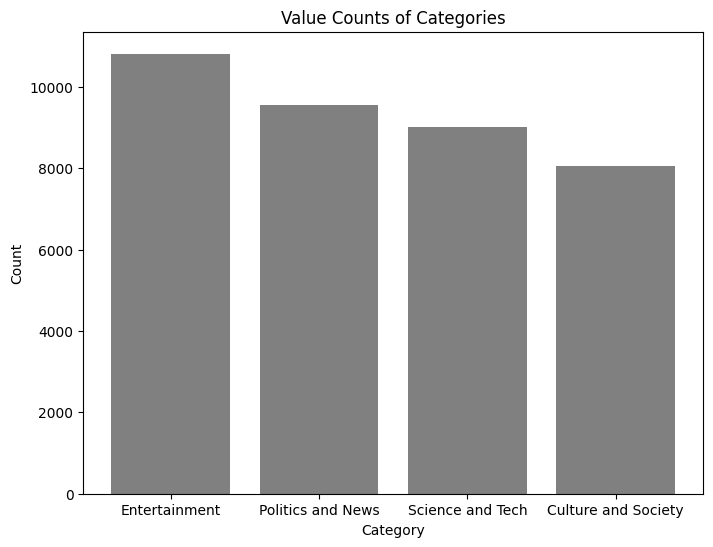

In [ ]:
# Calculate value counts
value_counts = df['category'].map(category_map).value_counts()

# Define colors for each category
colors = ['grey', 'grey', 'grey', 'grey']

# Plot bar graph
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
df['label'].value_counts()

label
0    19076
1    18372
Name: count, dtype: int64

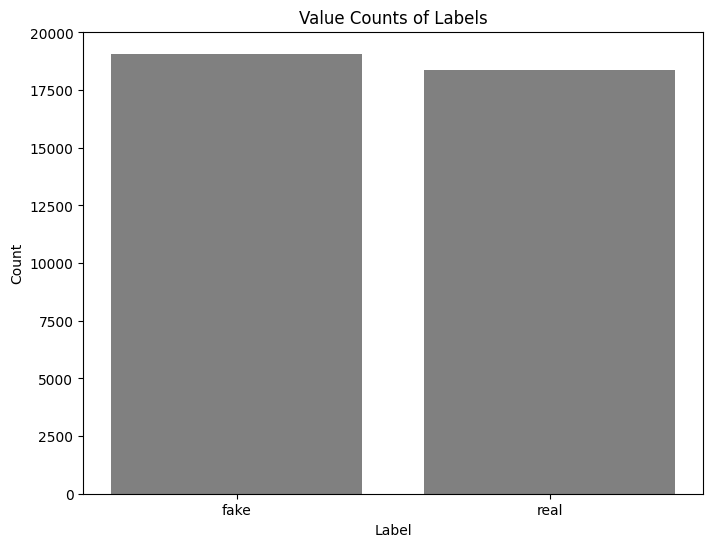

In [ ]:
# Calculate value counts
value_counts = df['label'].map(label_map).value_counts()

# Define colors for each category
colors = ['grey', 'grey']

# Plot bar graph
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color=colors)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Value Counts of Labels')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

label                fake  real
category                       
Culture and Society  4188  3878
Entertainment        5491  5328
Politics and News    5105  4452
Science and Tech     4292  4714


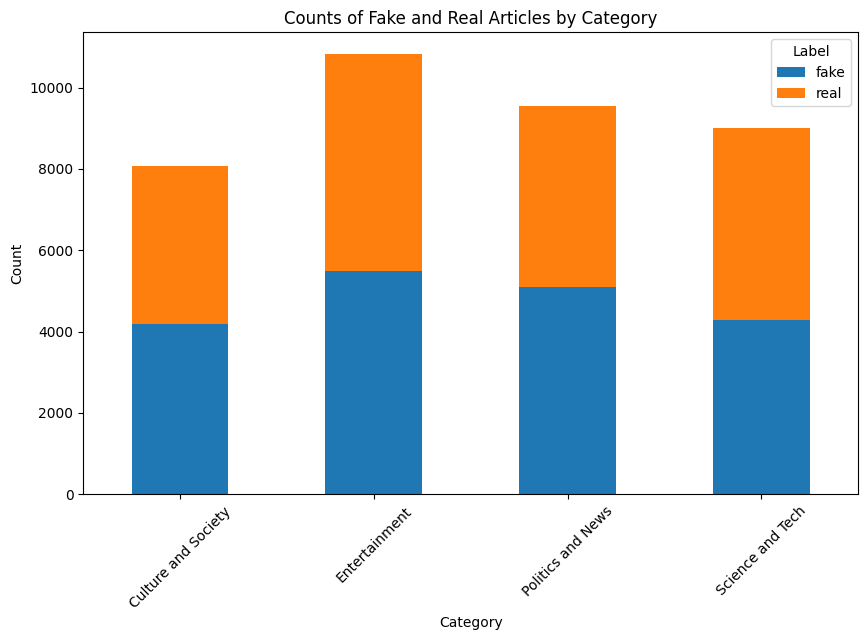

In [ ]:
df_mapped = df.copy()
df_mapped['category'] = df_mapped['category'].map(category_map)
df_mapped['label'] = df_mapped['label'].map(label_map)

# Group by Category and get value counts of labels
category_counts = df_mapped.groupby('category')['label'].value_counts().unstack().fillna(0)

# Display the result
print(category_counts)

category_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Fake and Real Articles by Category')
plt.xticks(rotation=45)
plt.legend(title='Label', loc='upper right')
plt.show()

In [ ]:
df = clean_text(df)

In [ ]:
X = df['text']
Y = df['label'].astype('category')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True,stratify=Y)

In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tf_idf_matrix=tfidf.fit_transform(freq_term_matrix)

freq_term_matrix_test = count_vectorizer.transform(X_test)
tf_idf_matrix_test = tfidf.transform(freq_term_matrix_test)

In [ ]:
# # logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(tf_idf_matrix,y_train)

y_pred = model.predict(tf_idf_matrix)
lracc_train = accuracy_score(y_train, y_pred)

y_pred=model.predict(tf_idf_matrix_test)

lracc_test = accuracy_score(y_test, y_pred)

lf1_score = metrics.f1_score(y_test, y_pred)

print("model = logistic regression")
print("train_accuracy = ", lracc_train)
print("test_accuracy = ", lracc_test)
print("F1 score = ", lf1_score)

In [ ]:
# # naive bayes

naive_bayes = MultinomialNB()

naive_bayes.fit(tf_idf_matrix,y_train)

y_pred = model.predict(tf_idf_matrix)
acc_train = accuracy_score(y_train, y_pred)

y_pred=naive_bayes.predict(tf_idf_matrix_test)
acc_test = accuracy_score(y_test, y_pred)

nbf1_score = metrics.f1_score(y_test, y_pred)

print("model = Naive Bayes")
print("acc_train = ", acc_train)
print("acc_test = ", acc_test)
print("F1 score = ", nbf1_score)

In [ ]:
# Xgboost

model = XGBClassifier(scale_pos_weight=1,learning_rate=0.1,colsample_bytree = 0.6,subsample = 0.8,objective='binary:logistic',n_estimators=2000, reg_alpha = 0.5,max_depth=6, gamma=10)
model.fit(tf_idf_matrix,y_train)

y_pred = model.predict(tf_idf_matrix)
xgbacc_train = accuracy_score(y_train, y_pred)

y_pred=model.predict(tf_idf_matrix_test)
xgbacc_test = accuracy_score(y_test, y_pred)

xgbf1_score = metrics.f1_score(y_test, y_pred, average="weighted")

print("model = XgBoost")
print("xgbacc_train= ", xgbacc_train)
print("xgbacc_test = ", xgbacc_test)
print("f1 score = ", xgbf1_score)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(9, 2), (10, 5), (5, 5)],
    'alpha': [1e-5, 1e-4, 1e-3],
    'activation': ['logistic', 'relu', 'tanh'],
}
mlp = MLPClassifier(solver='lbfgs', random_state=1)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3)
grid_search.fit(tf_idf_matrix, y_train)

best_clf = grid_search.best_estimator_
best_clf.fit(tf_idf_matrix, y_train)
y_train_pred = best_clf.predict(tf_idf_matrix)
y_test_pred = best_clf.predict(tf_idf_matrix_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)

# Print best parameters found by grid search
print("Best parameters found by grid search:")
print(grid_search.best_params_)

#clf.fit(tf_idf_matrix, y_train)
#y_pred = clf.predict(tf_idf_matrix)
#t_acc = accuracy_score(y_train,y_pred)
#t_acc


In [ ]:
#y_test_pred = clf.predict(tf_idf_matrix_test)
#test_acc = accuracy_score(y_test,y_test_pred)
#test_acc

In [ ]:
# Random forest

rfclassifier = RandomForestClassifier(n_estimators=500 )
rfclassifier.fit(tf_idf_matrix, y_train)

y_pred = rfclassifier.predict(tf_idf_matrix)
rfacc_train = accuracy_score(y_train, y_pred)


y_pred = rfclassifier.predict(tf_idf_matrix_test)
rfacc_test = accuracy_score(y_test, y_pred)

rff1_score = metrics.f1_score(y_test, y_pred, average="weighted")

print("model = Random Forest")
print("rfacc_train= ", rfacc_train)
print("rfacc_test= ", rfacc_test)
print("f1 score = ", rff1_score)

In [ ]:
# Ada Boost

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=1000, algorithm="SAMME", random_state=0)

clf.fit(tf_idf_matrix,y_train)

y_pred=clf.predict(tf_idf_matrix)
adaboostAcc_train = accuracy_score(y_train,y_pred)

y_pred=clf.predict(tf_idf_matrix_test)
# output = model.predict(tf_idf_matrix_test)

adaboostAcc_test = accuracy_score(y_test, y_pred)
adaF1 = metrics.f1_score(y_test, y_pred, average="weighted")

print("model = AdaBoost")
print("adaboostAcc_train = ", adaboostAcc_train)
print("adaboostAcc_test = ", adaboostAcc_test)
print("f1 score = ", adaF1)

#**Phase 2**

In [ ]:
import re
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import  tree
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plotter

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['text_length'] = df['text'].apply(len)
df['words_counts'] = df['text'].str.split().map(lambda x: len(x))
df['punctuation_count'] = df['text'].map(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [ ]:
def clean_text(text):
    text = text.lower()                                  # lower-case all characters
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = text.lower()
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return text

In [ ]:
# df['text'] = df['text'].apply(clean_text)

In [ ]:
X = df['text']
Y = df['category'].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.10,random_state=42,stratify=Y, shuffle=True)

In [ ]:
# Vectorisation
vectorizer = TfidfVectorizer()
train_vectorizer = vectorizer.fit_transform(X_train)
test_vectorizer = vectorizer.transform(X_test)

In [ ]:
train_vectorizer.shape

(33703, 136335)

In [ ]:
# random forest

rfclassifier = RandomForestClassifier(n_estimators=500)
rfclasssifier_train = rfclassifier.fit(train_vectorizer,y_train)
y_pred = rfclassifier.predict(test_vectorizer)

Acc_train = rfclassifier.score(train_vectorizer, y_train)
acc_test = rfclassifier.score(test_vectorizer, y_test)

my_Category =['entertainment','politics and news','culture and society','science and tech']

print('Train Accuracy : {:.2f}%'.format(Acc_train*100))
print('Test Accuracy  : {:.2f}%'.format(acc_test*100))
print(classification_report(y_test, y_pred,target_names=my_Category))
print('******** Classification Report ***************')

In [ ]:
# !pip install transformers
# !pip install datasets

In [ ]:
# Bert
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

encoded_data_train = tokenizer.batch_encode_plus(
    X_train.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    X_test.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_test.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=4,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)

epochs = 1

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix

label_dict = {'entertainment':0, 'politics and news': 1, 'culture and society':2, 'science and tech':3}
label_dict_inverse = {v: k for k, v in label_dict.items()}

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    confusion_matrices = multilabel_confusion_matrix(labels_flat, preds_flat, labels=[0,1,2,3])
    for i, confusion_matrix in enumerate(confusion_matrices):
        disp = ConfusionMatrixDisplay(confusion_matrix)
        disp.plot(include_values=True, cmap="viridis", ax=None, xticks_rotation="vertical")
        plt.title(f"confusion matrix for {label_dict_inverse[i]}")
        plt.show()
        # plt.clf()

    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):


    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    local_acc = 0
    for label in np.unique(labels_flat):
        print("label = ", label)
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]

        tmp_acc = len(y_preds[y_preds==label])/len(y_true)

        # disp = ConfusionMatrixDisplay.from_predictions(y_true, y_preds)
        # disp.plot()
        # plt.show()
        # plt.clf()

        # print(f'\nClass: {label_dict_inverse[label]}')
        # print('Accuracy:' , tmp_acc)
        local_acc+=tmp_acc
    return float(local_acc/4)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/11235 [00:00<?, ?it/s]


Epoch 1
Training accuracy: 0.8939560276533246


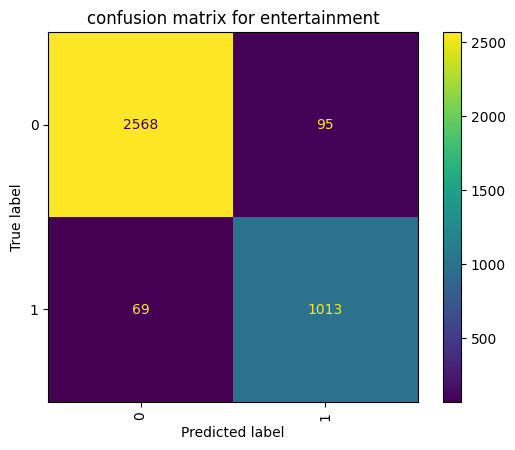

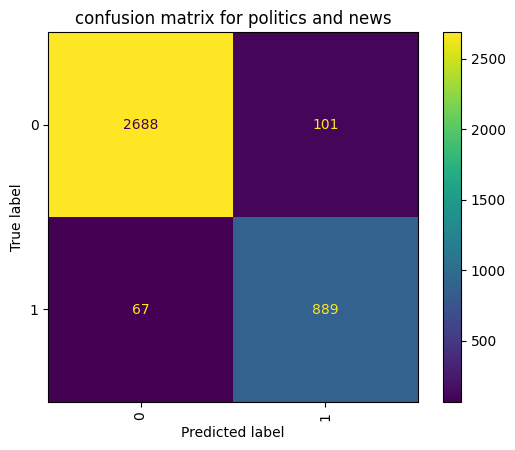

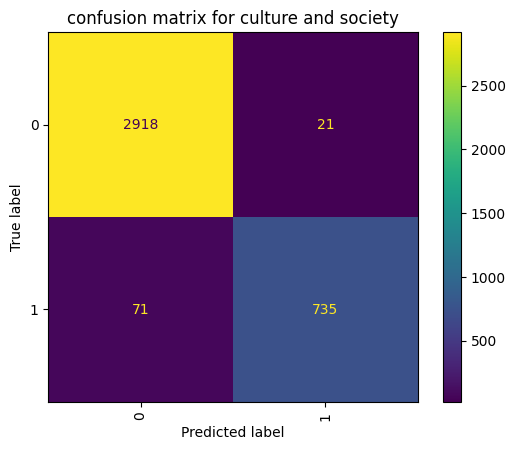

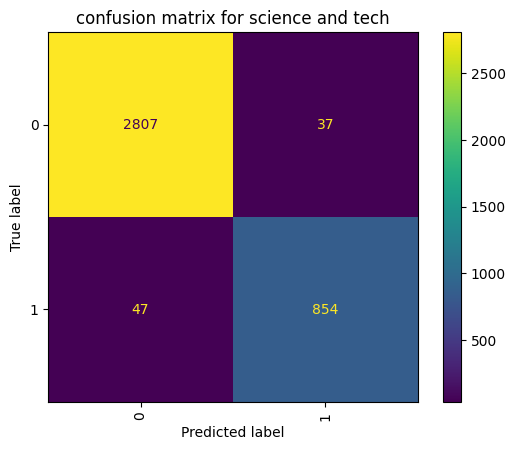

label =  0
label =  1
label =  2
label =  3

Average test acc: 0.9314729828028078

F1 Score (Weighted): 0.9323723085955233


Epoch 2:   0%|          | 0/11235 [00:00<?, ?it/s]

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

model.to('cuda')

train_loss_plot_val = []
val_loss_plot_val = []

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

epochs = 5
for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0
    correct_predictions = 0
    total_predictions = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()

        logits = outputs[1]
        _, predicted = torch.max(logits, 1)
        correct_predictions += torch.sum(predicted == inputs['labels']).item()
        total_predictions += len(inputs['labels'])

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')

    train_accuracy = correct_predictions / total_predictions
    # Print training accuracy

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    train_loss_plot_val.append(loss_train_avg)
    tqdm.write(f'Training accuracy: {train_accuracy}')
    # tqdm.write(f'Training loss: {loss_train_avg}\n')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_loss_plot_val.append(val_loss)
    val_f1 = f1_score_func(predictions, true_vals)

    avg_test_acc = accuracy_per_class(predictions, true_vals)

    # tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'\nAverage test acc: {avg_test_acc}')
    tqdm.write(f'\nF1 Score (Weighted): {val_f1}')

plt.plot(train_loss_plot_val, label='Training Loss')
plt.plot(val_loss_plot_val, label='Validation Loss')

# Add titles and labels
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Add legend
plt.legend()

# Add ticks for x-axis (epochs)
plt.xticks(range(len(train_loss_plot_val)), ['Epoch 1', 'Epoch 2','Epoch 3','Epoch 4','Epoch 5'])

In [ ]:
print(train_loss_plot_val)

In [ ]:
print(val_loss_plot_val)